In [1]:
using PyPlot

include("modgen_LSDE.jl")
include("..\\..\\Tools\\Model_Reduction_Dev.jl")

vector_wiener_filter_fft

In [3]:
A = reshape([-0.05],1,1)
σ = reshape([1],1,1)
Xo = [1]
t_disc = 1000
gap = 1
scheme = "EM"

t_start = 0
t_stop  = 1e4
h       = 1e-2

d = size(A,1)

X = modgen_LSDE(t_start,t_stop,h,
    A = A,
    σ = σ,
    Xo = Xo,
    t_disc = t_disc,
    gap = gap,
    scheme = scheme)

N = size(X,2)

nfft = nextfastfft(N)
X = [X zeros(d,nfft - N)]


1×900375 Array{Float64,2}:
 3.04899  2.95558  2.93854  2.82519  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

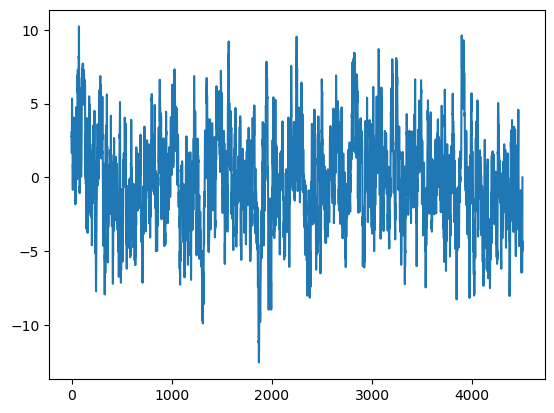

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002E8DC2C8>

In [4]:
plot(X[1,1:200:end])

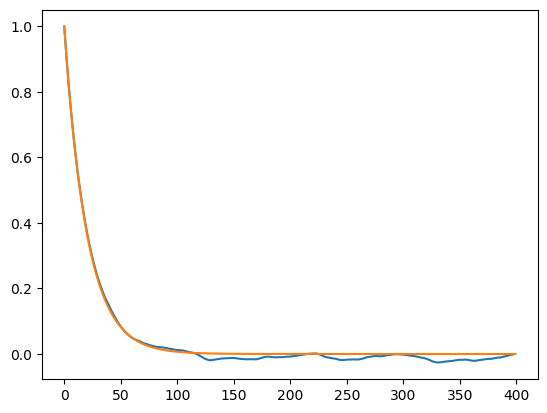

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004A0CC088>
 PyObject <matplotlib.lines.Line2D object at 0x000000004A0C60C8>

In [43]:
lags = 1:100:40000

A1 = real(my_crosscor(X[1,:],X[1,:],lags))
A1_ana = [((1 .+ h*A)^n)[1] for n = lags]

plot([real(A1) A1_ana])

In [31]:
spect_ana_fun(z) = h*σ[1]^2/( (1-(1+h*A[1])/z)*(1-(1+h*A[1])*z))
N = size(X,2)
Θ = 2π*(0:N-1)/N
Z = exp.(im*Θ)

spect_ana = spect_ana_fun.(Z)

spect_ana_fun (generic function with 1 method)

In [37]:
maximum(abs.(imag.(spect_ana))) # check size of imaginary part

5.7692540444778235e-9

In [38]:
spect_num = z_crossspect_fft(X,X,n = 3, p = 500)[:]

1×1×9830400 Array{Complex,3}:
[:, :, 1] =
 31093.960195985062 - 3.2866017801062475e-13im

[:, :, 2] =
 31093.980254261645 - 1.5186118243640934e-13im

[:, :, 3] =
 31093.96020073947 - 5.968557944682336e-13im

...

[:, :, 9830398] =
 31093.659178081987 - 5.400122375574334e-13im

[:, :, 9830399] =
 31093.799744022366 - 1.6165532382348666e-12im

[:, :, 9830400] =
 31093.9000516441 - 7.10536869647485e-15im

In [40]:
maximum(abs.(imag.(spect_num))) # check size of imaginary part

5.744823829176238e-12

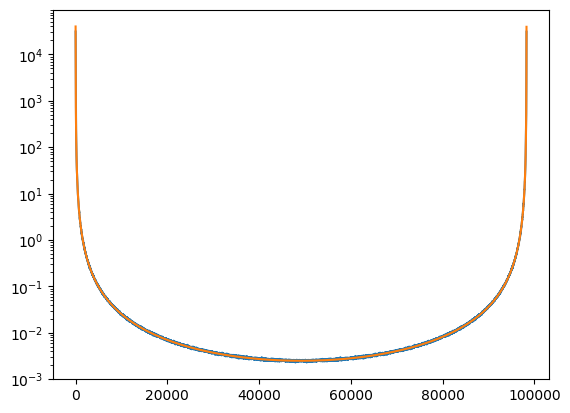

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003F957208>
 PyObject <matplotlib.lines.Line2D object at 0x0000000040C34408>

In [42]:
semilogy(real([spect_num[1:100:end] spect_ana[1:100:end]]))

Looks like the numerical approximation is accurate.